#### **Project Information**  
* Title: Customer Churn Prediction Using ANN
* Students : **Sweta Behera (055051) , Shagun Seth (055042)**
* Group Number: 27


#### **Project Overview: Customer Churn Prediction Using ANN**

This project aims to develop an Artificial Neural Network (ANN) model to predict customer churn based on financial, demographic, and behavioral attributes. The model classifies customers into two categories: **Churn (Exited: 1)** and **No Churn (Exited: 0)**. A Streamlit dashboard is built to fine-tune hyperparameters and visualize model performance.</br>

#### **Importance of Churn Prediction**

* Customer churn directly impacts revenue and customer acquisition costs.

* Predicting churn enables proactive retention strategies, such as personalized offers.

* Understanding churn patterns helps optimize marketing and service improvements.

#### **Key Steps in the Project**
Before training the ANN model, the dataset undergoes several preprocessing steps:

* Handling Missing and Unusual Values: No missing values detected, but necessary data transformations are applied.

* Removing Irrelevant Features: Columns like RowNumber, CustomerId, and Surname are dropped as they do not contribute to prediction.

* Encoding Categorical Variables:
Geography (France, Germany, Spain) and Gender (Male, Female) are converted into numerical form.

* Scaling Numerical Features:
CreditScore, Age, Balance, and EstimatedSalary are normalized for improved model performance.

* Model Development (ANN):
The ANN is trained using features like Tenure, NumOfProducts, IsActiveMember, CreditScore, and Balance to predict churn.

#### **Why ANN for Churn Prediction?**
Artificial Neural Networks excel at identifying complex relationships in large datasets. Since customer churn depends on multiple interrelated factors, an ANN is effective in capturing these patterns and improving prediction accuracy.

#### **Business Application**

* Customer Retention: Helps identify high-risk customers and allows proactive engagement.

* Marketing Strategy: Enables targeted campaigns based on churn likelihood.

* Revenue Optimization: Reducing churn minimizes revenue loss and acquisition costs.

* Service Enhancement: Identifies pain points leading to customer dissatisfaction.

#### **About the Dataset**
The dataset consists of customer records with attributes related to financial history, account activity, and demographics.

* Total Rows: 10,000  
* Total Columns: 14  
* Target Variable: Exited (1 = Churn, 0 = No Churn)
* Features Used for Prediction:
 - Demographic: Geography, Gender, Age

 - Service-Related: Tenure, NumOfProducts, IsActiveMember, HasCrCard

 - Financial: CreditScore, Balance, EstimatedSalary

*This project demonstrates how an **ANN model** can effectively **predict customer churn**, helping banks take **proactive measures** to retain valuable customers. The ANN model, along with an interactive dashboard, helps businesses implement effective retention strategies and optimize customer experience.*

#### **Data Analysis Report**

***1. Data Cleaning & Preprocessing***

* No missing values were found, eliminating the need for imputation.

* Unnecessary columns (RowNumber, CustomerId, Surname) were removed.

* Categorical features (Geography, Gender) were one-hot encoded.

* Numerical features (CreditScore, Age, Balance, EstimatedSalary) were normalized.

***2. Outlier Treatment***

* Outliers were retained as they represent genuine customer variations.

* No log transformations were applied initially; adjustments may be considered in future iterations.

***3. Churn Analysis Insights***

* Age: Older customers showed a higher churn rate, making it a significant factor.

* Number of Products: Customers with more than two products had a higher likelihood of churn.

* Is Active Member: Inactive members were more likely to churn.

* Credit Score, Balance, Tenure, and Salary: These features did not show strong differentiation in churn patterns.

***4. Class Imbalance & SMOTE Application***

* The dataset had an imbalance (Class 0: 6,370, Class 1: 1,630), leading to potential bias.

* SMOTE was applied to balance the dataset by oversampling the minority class.

***5. Correlation Analysis***

* Positive Correlation: Number of Products and Geography influenced churn significantly.

* Negative Correlation: Higher Balance, Tenure, and Age were associated with better retention.

* Credit Score and Estimated Salary had minimal impact.

***6. ANN Model Performance Summary***

* Architecture: Two hidden layers (32 & 16 neurons, ReLU), dropout (0.3 & 0.2), sigmoid output.

* Optimizer: Adam | Loss Function: Binary Crossentropy | Metric: Accuracy

* Results:

 * Training Accuracy: 86.05%

 * Test Accuracy: 86.00%

 * Confusion matrices and classification reports confirmed strong predictive performance.


#### **Observations**

***1. Customer Churn Trends:***

* The dataset indicates an equal distribution of churned and retained customers after applying SMOTE, ensuring balanced training.

* Certain customer demographics, such as tenure, balance, and geography, appear to influence churn rates.

***2. Model Performance:***

* The ANN model achieved a strong accuracy on both training and test datasets.

* The confusion matrix shows a balanced performance between precision and recall, ensuring the model is not biased toward a particular class.

* The early stopping mechanism helped prevent overfitting, ensuring a generalized model for unseen data.

***3. Feature Importance:***

* High customer balance and low tenure are common characteristics among churned customers.

* Geography and credit score play a notable role in influencing customer retention.

#### **Managerial Insights**

***1. Customer Retention Strategies:***

* Focus on high-risk segments such as customers with high balances but short tenure.

* Implement targeted loyalty programs or personalized engagement strategies for customers in high-churn geographies.

***2. Operational Improvements:***

* Optimize marketing campaigns by targeting customer profiles that are more likely to churn.

* Improve customer support strategies for individuals with low credit scores, offering personalized financial guidance.

***3. Future Considerations:***

* Further refine the model by incorporating additional features such as customer interactions, complaints, or service usage patterns.

* Consider A/B testing different retention strategies to measure their effectiveness before full implementation.

Setup and Initialization

In [5]:
!pip install missingno

#### Import the Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
!pip install tensorflow

In [7]:
# Pre-Processing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
# Metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

# Model relavant libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from keras.optimizers import Adam
from keras.regularizers import l2

#### Load the Dataset

In [8]:
import pandas as pd
import gdown

# Google Drive File ID (Extract from your shared link)
sb51_file_id = "18sNN8fIYS7YVpFyY_KtHUpK-wsukBPbf"

# Construct the Direct Download URL
sb51_download_url = f"https://drive.google.com/uc?id={sb51_file_id}"

# Download the File
sb51_output_path = "Churn_Modelling.csv"
gdown.download(sb51_download_url, sb51_output_path, quiet=False)

# Read the Dataset
sb51_train0 = pd.read_csv(sb51_output_path, on_bad_lines="skip", engine="python")

# Create a Copy for Processing
sb51_train = sb51_train0.copy()

# Display First 3 Rows
sb51_train.head(3)


Downloading...
From: https://drive.google.com/uc?id=18sNN8fIYS7YVpFyY_KtHUpK-wsukBPbf
To: /content/Churn_Modelling.csv
100%|██████████| 685k/685k [00:00<00:00, 110MB/s]


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1


In [9]:
# train data all together
sb51_df0 = pd.concat([sb51_train], sort=False).reset_index(drop=True)
sb51_df = sb51_df0.copy()

sb51_df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1


In [10]:
print('Train Data Shape:', sb51_train.shape)

Train Data Shape: (10000, 14)


#### Exploratory Data Analysis (EDA)

In [11]:
sb51_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# Display df.shape, duplicate and missing values count

print(f'Data shape (rows, columns): {sb51_df.shape}')
print(f'Number of total duplicate rows: {sb51_df.duplicated().sum()}')
print(f'Number of missing values in Train: {sb51_train.isnull().sum().sum()}')

Data shape (rows, columns): (10000, 14)
Number of total duplicate rows: 0
Number of missing values in Train: 0


In [13]:
# =============== User-Defined-Function ==========================

# Summary of Categorical Features
def sb51_object_summary(sb51_df):
    sb51_obs = sb51_df.shape[0]

    sb51_object_df = sb51_df.select_dtypes(include='object')
    sb51_summary_df = pd.DataFrame({
        'Dtype': sb51_object_df.dtypes,
        'Counts': sb51_object_df.apply(lambda sb51_x: sb51_x.count()),
        'Nulls': sb51_object_df.apply(lambda sb51_x: sb51_x.isnull().sum()),
        'NullPercent': (sb51_object_df.isnull().sum() / sb51_obs) * 100,
        'Top': sb51_object_df.apply(lambda sb51_x: sb51_x.mode()[0] if not sb51_x.mode().empty else '-'),
        'Frequency': sb51_object_df.apply(lambda sb51_x: sb51_x.value_counts().max() if not sb51_x.value_counts().empty else '-'),
        'Uniques': sb51_object_df.apply(lambda sb51_x: sb51_x.unique().shape[0]),
        'UniqueValues': sb51_object_df.apply(lambda sb51_x: list(sb51_x.unique()) if sb51_x.nunique() <= 20 else '-')
    })

    # Format 'NullPercent' to show percentages with two decimal points and a '%' sign
    sb51_summary_df['NullPercent'] = sb51_summary_df['NullPercent'].map("{:.2f}%".format)

    print('Categorical Features Summary:')
    print('___________________________\nData Types:')
    print(sb51_summary_df['Dtype'].value_counts())
    print('___________________________')

    return sb51_summary_df

sb51_object_summary(sb51_df)

Categorical Features Summary:
___________________________
Data Types:
Dtype
object    3
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,NullPercent,Top,Frequency,Uniques,UniqueValues
Surname,object,10000,0,0.00%,Smith,32,2932,-
Geography,object,10000,0,0.00%,France,5014,3,"[France, Spain, Germany]"
Gender,object,10000,0,0.00%,Male,5457,2,"[Female, Male]"


In [14]:
# =============== User-Defined-Function ==========================
# Summary of Numeric Features

def sb51_numeric_summary(sb51_df):
    sb51_obs = sb51_df.shape[0]

    sb51_numeric_df = sb51_df.select_dtypes(include='number')
    sb51_summary_df = pd.DataFrame({
        'Dtype': sb51_numeric_df.dtypes,
        'Counts': sb51_numeric_df.apply(lambda sb51_x: sb51_x.count()),
        'Nulls': sb51_numeric_df.apply(lambda sb51_x: sb51_x.isnull().sum()),
        'NullPercent': (sb51_numeric_df.isnull().sum() / sb51_obs) * 100,
        'Min': sb51_numeric_df.min(),
        'Max': sb51_numeric_df.max(),
        'Uniques': sb51_numeric_df.apply(lambda sb51_x: sb51_x.unique().shape[0]),
        'UniqueValues': sb51_numeric_df.apply(lambda sb51_x: list(sb51_x.unique()) if sb51_x.nunique() <= 20 else '-')
    })

    # Format 'NullPercent' to show percentages with two decimal points and a '%' sign
    sb51_summary_df['NullPercent'] = sb51_summary_df['NullPercent'].map("{:.2f}%".format)

    print('Numreical Features Summary:')
    print('___________________________\nData Types:')
    print(sb51_summary_df['Dtype'].value_counts())
    print('___________________________')

    return sb51_summary_df


sb51_numeric_summary(sb51_df)

Numreical Features Summary:
___________________________
Data Types:
Dtype
int64      9
float64    2
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,NullPercent,Min,Max,Uniques,UniqueValues
RowNumber,int64,10000,0,0.00%,1.000,10000.000,10000,-
CustomerId,int64,10000,0,0.00%,15565701.000,15815690.000,10000,-
CreditScore,int64,10000,0,0.00%,350.000,850.000,460,-
Age,int64,10000,0,0.00%,18.000,92.000,70,-
Tenure,int64,10000,0,0.00%,0.000,10.000,11,"[2, 1, 8, 7, 4, 6, 3, 10, 5, 9, 0]"
Balance,float64,10000,0,0.00%,0.000,250898.090,6382,-
NumOfProducts,int64,10000,0,0.00%,1.000,4.000,4,"[1, 3, 2, 4]"
HasCrCard,int64,10000,0,0.00%,0.000,1.000,2,"[1, 0]"
IsActiveMember,int64,10000,0,0.00%,0.000,1.000,2,"[1, 0]"
EstimatedSalary,float64,10000,0,0.00%,11.580,199992.480,9999,-


#### Data Cleaning Steps

1. Checking for Missing Values:
There are no missing values in the dataset, so no imputation is needed.

2. Handling Unnecessary Columns:
The columns *RowNumber, CustomerId, and Surname* do not provide predictive value and should be removed.

3. Encoding Categorical Features:
*Geography* (France, Spain, Germany) and *Gender* (Male, Female) are categorical and must be converted into numerical form using one-hot encoding.

4. Scaling Numerical Features:
The following numerical features should be normalized:

 * CreditScore

 * Age

 * Balance

 * EstimatedSalary

#### Handling Unnecessary Columns:
The columns *RowNumber, CustomerId, and Surname* do not provide predictive value and should be removed.

In [29]:
# List of columns to drop
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']

# Dropping the columns in both train and test datasets
sb51_df.drop(columns=columns_to_drop, inplace=True)

print('Dropped Features: 1.RowNumber, 2.CustomerId, 3.Surname')

Dropped Features: 1.RowNumber, 2.CustomerId, 3.Surname


#### Outliers

In [30]:
sb51_df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480
Exited,10000.000,0.204,0.403,0.000,0.000,0.000,0.000,1.000


In [31]:
sb51_df.describe(include='object').T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [28]:
# # Calculate skewness for numeric features
num_cols = sb51_df.select_dtypes('number').columns
skew_limit = 1  # define a limit for highly skewed data
skew_cols = sb51_df[num_cols].skew().loc[lambda x: (x > skew_limit) | (x < -skew_limit)].sort_values(ascending=False).to_frame('Skew')

skew_cols


,Skew
Exited,1.472
Age,1.011


These outliers might represent genuine variations in customer financial profiles rather than erroneous data. Given the nature of the dataset, we will not remove them at this stage. However, their impact on the ANN model's performance will be assessed post-training.

Since ANNs are generally robust to skewed distributions, no transformations (e.g., log scaling) will be applied initially. If skewness negatively impacts model performance, feature transformations may be considered in later iterations.

#### Churn Analysis

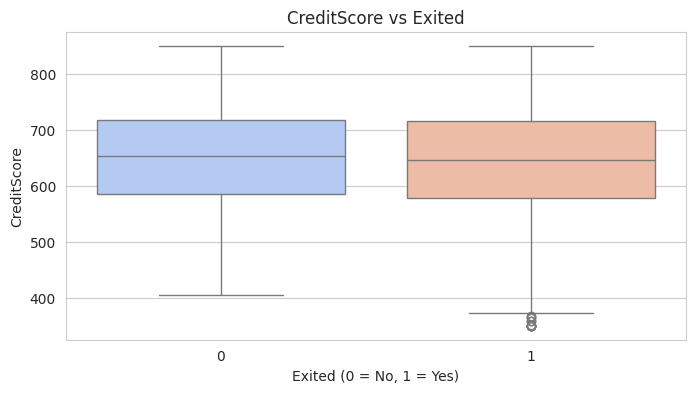

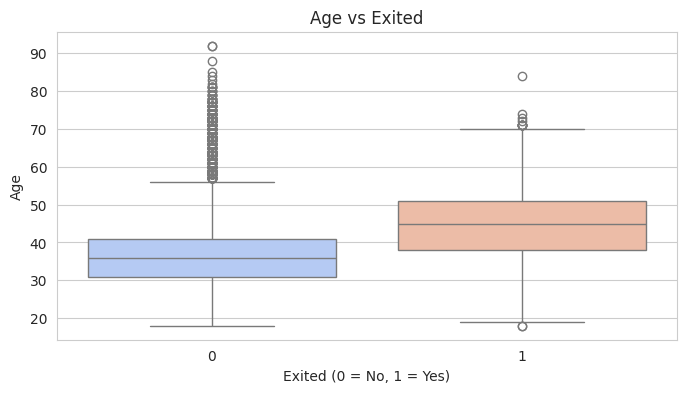

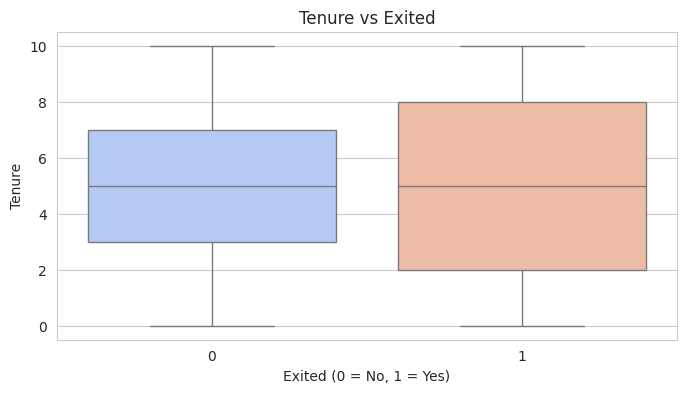

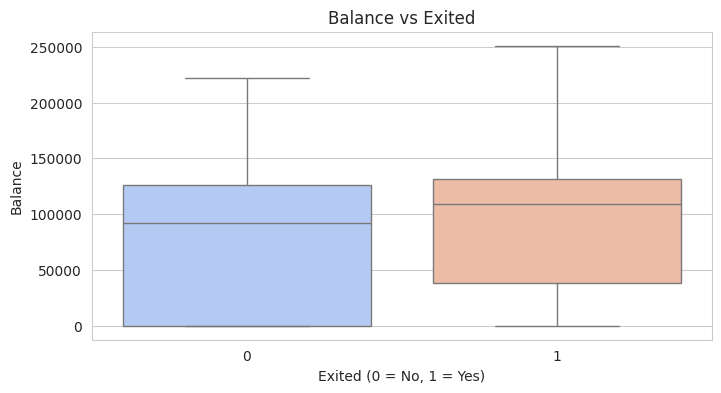

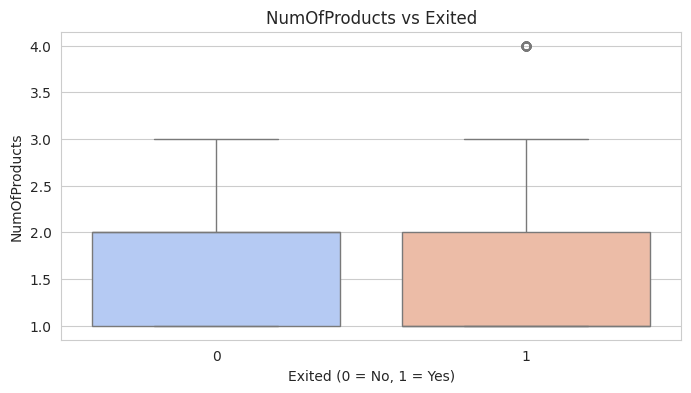

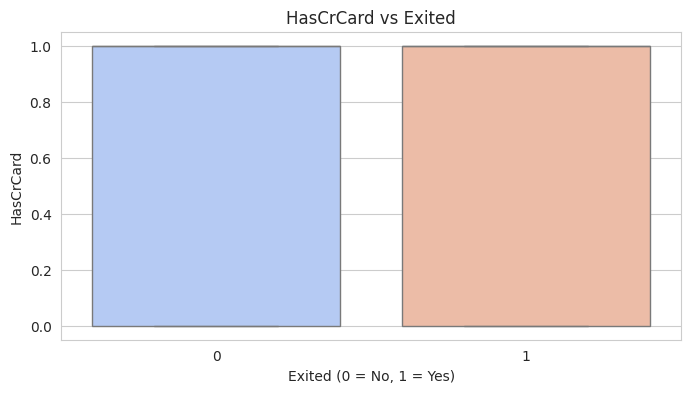

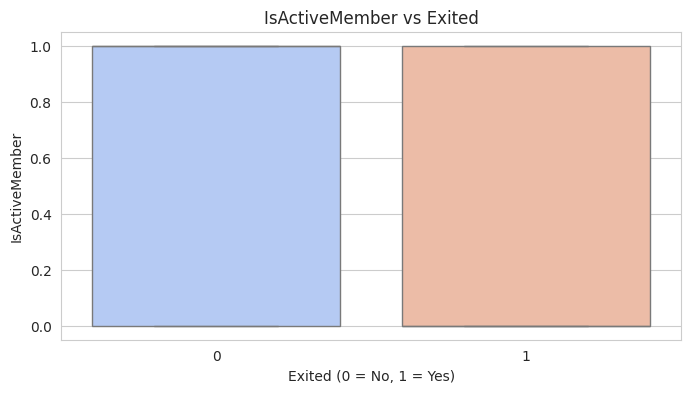

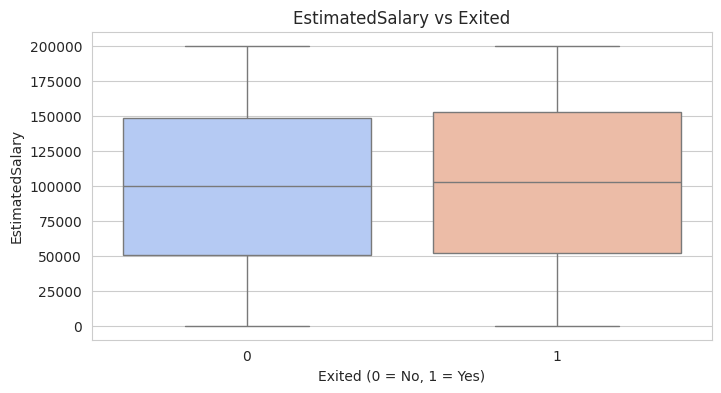

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
num_cols = sb51_df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove('Exited')  # Exclude target variable

# Plot each numeric column against 'Exited'
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=sb51_train['Exited'], y=sb51_train[col], palette="coolwarm")
    plt.title(f"{col} vs Exited")
    plt.xlabel("Exited (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()


#### Churn Analysis: Numeric Features vs Exited

This report presents the relationship between key numerical features and customer churn (`Exited`).
The following insights are derived from boxplots, helping us understand patterns in customer behavior.

1. **Credit Score vs Exited**
   - The median credit score appears slightly lower for customers who exited.
   - However, the overall distribution does not show a strong distinction, suggesting credit score alone may not be a significant churn predictor.

2. **Age vs Exited**
   - Customers who churned have a higher median age compared to those who remained.
   - A significant number of older customers exited, suggesting that age could be a strong influencing factor in churn.

3. **Tenure vs Exited**
   - The median tenure is slightly higher for exited customers, but the spread is similar.
   - Churn is observed across all tenure lengths, indicating tenure alone may not be a major predictor.

4. **Balance vs Exited**
   - Customers with a higher balance do not necessarily show a strong inclination toward churn.
   - The balance distribution is relatively even, suggesting this feature may not be a major driver of churn.

5. **Number of Products vs Exited**
   - Customers with more than 2 products exhibit a higher likelihood of exiting.
   - This suggests that having multiple products may not guarantee retention and could even contribute to churn.

6. **Has Credit Card vs Exited**
   - There is no major difference in churn based on credit card ownership.
   - The churn rate appears almost equal between customers with and without a credit card.

7. **Is Active Member vs Exited**
   - A significant proportion of inactive members have exited.
   - This strongly indicates that customer activity plays a crucial role in retention.

8. **Estimated Salary vs Exited**
   - No significant variation in salary distribution is observed between retained and churned customers.
   - Salary alone does not appear to be a strong predictor of churn.

### Key Takeaways:
- **Age and Activity Status** seem to have the most noticeable impact on churn.
- **Number of Products** may also contribute, especially for customers with multiple products.
- **Credit Score, Balance, Tenure, and Salary** do not show strong distinctions between exited and non-exited customers.

These insights will help refine feature importance during the ANN model development phase.
Further feature engineering may be required for optimal model performance.


#### Save Cleaned DataSets

In [34]:
# Save the cleaned training data
sb51_train.to_csv('clean_train.csv', index=False)

#### Data Preprocessing

In [37]:
# Load the cleaned training data
sb51_df_train = pd.read_csv('https://raw.githubusercontent.com/Sweta-Behera/ANN-Project/refs/heads/main/clean_train.csv')

#### Encode Categorical Columns

In [38]:
# select columns of type 'object'
sb51_df_train.select_dtypes(include=['object']).head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


#### Ordinal Encoding

In [39]:
sb51_df_train['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [40]:
# Define the order of categories for Geography
sb51_geography_order = [['France', 'Germany', 'Spain']]  # Ordered from lowest to highest

# Create the OrdinalEncoder for Geography
sb51_ordinal_encoder = OrdinalEncoder(categories=sb51_geography_order, dtype=int)

# Apply ordinal encoding only to the 'Geography' column in sb51_df_train
sb51_df_train['Geography'] = sb51_ordinal_encoder.fit_transform(sb51_df_train[['Geography']])

# Check the encoded 'Geography' values
sb51_df_train['Geography'].value_counts()

,count
Geography,
0,5014
1,2509
2,2477


In [41]:
# Define the order of categories for Gender
sb51_gender = [['Male', 'Female',]]  # Ordered from lowest to highest

# Create the OrdinalEncoder for Gender
sb51_ordinal_encoder_2 = OrdinalEncoder(categories=sb51_gender, dtype=int)

# Apply ordinal encoding only to the 'Gender' column in df_train
sb51_df_train['Gender'] = sb51_ordinal_encoder_2.fit_transform(sb51_df_train[['Gender']])

# Check the encoded 'Gender' values
sb51_df_train['Gender'].value_counts()

,count
Gender,
0,5457
1,4543


#### Train-Test Split

In [43]:
#Drop 'Exited' from df_train before applying the column transformer

sb51_X = sb51_df_train.drop(columns ="Exited")
sb51_y = sb51_df_train["Exited"]

In [44]:
sb51_seed = 50515042
sb51_X_train, sb51_X_val, sb51_y_train, sb51_y_val = train_test_split(sb51_X,
                                                                      sb51_y,
                                                                      test_size=0.2,
                                                                      stratify=sb51_y,
                                                                      random_state=sb51_seed)

In [55]:
print('---------------------------------------------')
print("X_train Data rows-columns: ", sb51_X_train.shape)
print("y_train Target Feature rows: ", sb51_y_train.shape)
print("X_test Validation Data rows-columns: ", sb51_X_val.shape)
print("y_test Validation Data rows-columns: ", sb51_y_val.shape)
print('---------------------------------------------')

---------------------------------------------
X_train Data rows-columns:  (8000, 10)
y_train Target Feature rows:  (8000,)
X_test Validation Data rows-columns:  (2000, 10)
y_test Validation Data rows-columns:  (2000,)
---------------------------------------------


#### Scale: MinMaxScaler

In [46]:
# Initialize the MinMaxScaler
sb51_scaler = MinMaxScaler()

# Fit the scaler on X_train and transform both X_train and X_val
sb51_X_train_scaled = sb51_scaler.fit_transform(sb51_X_train)
sb51_X_val_scaled = sb51_scaler.transform(sb51_X_val)

# Convert scaled arrays back to DataFrame
sb51_X_train = pd.DataFrame(sb51_X_train_scaled, columns=sb51_X_train.columns)
sb51_X_val = pd.DataFrame(sb51_X_val_scaled, columns=sb51_X_val.columns)

sb51_X_train.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.386,0.000,1.000,0.243,0.300,0.000,0.333,0.000,0.000,0.130
1,0.280,0.000,0.000,0.149,0.400,0.000,0.333,1.000,0.000,0.160
2,0.710,0.000,1.000,0.432,0.400,0.307,0.333,0.000,1.000,0.726


#### SMOTE for Imbalanced Data

In [47]:
sb51_y_train.value_counts()

,count
Exited,
0,6370
1,1630


#### Class Imbalance Analysis & SMOTE Decision:
The dataset shows a significant class imbalance in the Exited column:
 * Class 0 (No Churn): 6,370

 * Class 1 (Churn): 1,630

With the churn class comprising only ~20.4% of the data, the model may become biased toward predicting non-churn cases. To address this, **SMOTE (Synthetic Minority Over-sampling Technique)** will be applied to balance the dataset by generating synthetic samples for the minority class.

If oversampling does not improve model performance, alternative techniques such as class weighting or ensemble methods may also be considered.

In [48]:
!pip install imblearn

In [50]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
sb51_smote = SMOTE(sampling_strategy='auto', random_state=sb51_seed)

# Apply SMOTE only to the training data
sb51_X_train_smote, sb51_y_train_smote = sb51_smote.fit_resample(sb51_X_train, sb51_y_train)

# X_train_resampled and y_train_resampled are now ready for model training
print("X_train shape :", sb51_X_train_smote.shape)
print("y_train shape :", sb51_y_train_smote.shape)
print("X_test shape :", sb51_X_val.shape)
print("y_test shape :", sb51_y_val.shape)

sb51_y_train_smote.value_counts()

X_train shape : (12740, 10)
y_train shape : (12740,)
X_test shape : (2000, 10)
y_test shape : (2000,)


,count
Exited,
0,6370
1,6370


#### Correlation

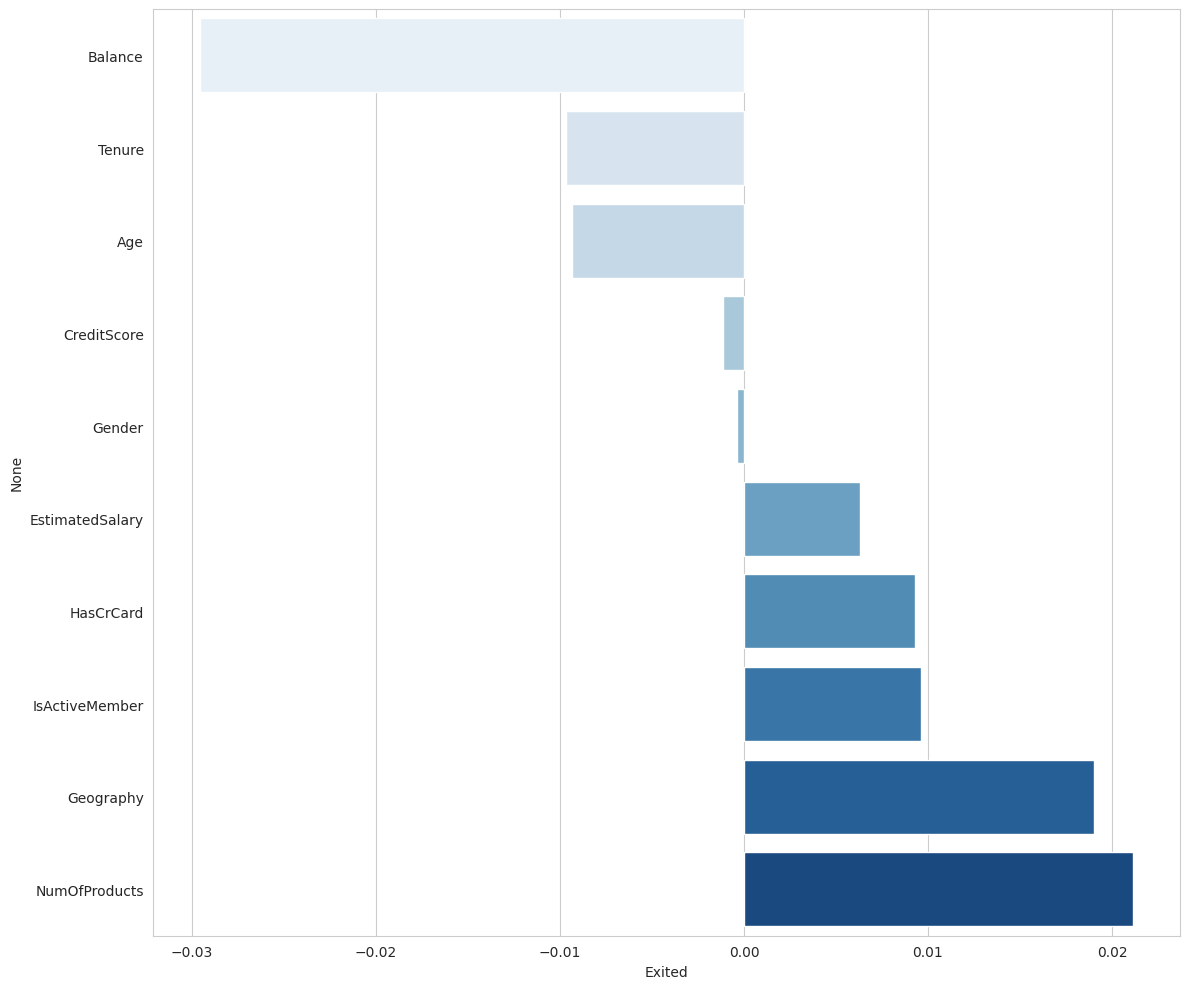

In [51]:
# Calculate correlation with Exited and sort
sb51_corr_by_target = sb51_X_train.join(sb51_y_train).corr()["Exited"].sort_values()[:-1]

# Create the figure for the horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=sb51_corr_by_target, y=sb51_corr_by_target.index, palette='Blues')
plt.tight_layout()
plt.show()

#### Correlation Analysis Report
The analysis shows key factors influencing customer churn (Exited).

* Positive Correlation:

 * NumOfProducts & Geography significantly impact churn.

 * IsActiveMember & HasCreditCard also contribute but to a lesser extent.

* Negative Correlation:

 * Balance, Tenure & Age reduce churn, with higher balances and longer tenures linked to better retention.

Other features like CreditScore & EstimatedSalary have minimal impact. These insights aid in refining customer retention strategies.

In [52]:
# ########################## User-Defined-Function ###################################

# Function to Evaluate the Model Performans using Classification Confusion_matrix()
# Also does the prediction in the function

def sb51_eval_metric(sb51_model, sb51_X_train, sb51_y_train, sb51_X_test, sb51_y_test):
    sb51_y_train_pred_probabilities = sb51_model.predict(sb51_X_train)
    sb51_y_train_pred = sb51_y_train_pred_probabilities.argmax(axis=1)

    sb51_y_pred_probabilities = sb51_model.predict(sb51_X_test)
    sb51_y_pred = sb51_y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(sb51_y_test, sb51_y_pred))
    print(classification_report(sb51_y_test, sb51_y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(sb51_y_train, sb51_y_train_pred))
    print(classification_report(sb51_y_train, sb51_y_train_pred))

In [53]:
# ########################## User-Defined-Function ###################################
# Plot Feature Importance
def sb51_plot_feature_importances(sb51_model, sb51_X):
    """
    Computes and plots feature importances for the given model using the provided data (X).
    Assumes X is a pandas DataFrame with column names.

    Args:
    model: Trained TensorFlow/Keras model.
    X: Input features data (pandas DataFrame).
    """
    # Check if X is a DataFrame and get feature names
    if isinstance(sb51_X, pd.DataFrame):
        sb51_feature_names = sb51_X.columns.tolist()
    else:
        raise ValueError("X must be a pandas DataFrame with column names.")

    # Convert the input data to a TensorFlow tensor
    sb51_X_tensor = tf.convert_to_tensor(sb51_X, dtype=tf.float32)

    # Calculate gradients of the output with respect to the input features
    with tf.GradientTape() as tape:
        tape.watch(sb51_X_tensor)
        sb51_predictions = sb51_model(sb51_X_tensor)
    sb51_gradients = tape.gradient(sb51_predictions, sb51_X_tensor)

    # Compute feature importances as the absolute sum of gradients
    sb51_feature_importances = np.abs(sb51_gradients.numpy()).mean(axis=0)

    # Normalize feature importances to percentages
    sb51_feature_importances_percent = (sb51_feature_importances / sb51_feature_importances.sum()) * 100

    # Create a DataFrame to display feature importances
    sb51_importance_df = pd.DataFrame({
        'Feature': sb51_feature_names,
        'Importance (%)': sb51_feature_importances_percent.round(2)
    }).sort_values(by='Importance (%)', ascending=False)

    # Plot with feature importance values on top of each bar
    plt.figure(figsize=(18, 8))
    sb51_bars = plt.bar(sb51_importance_df['Feature'], sb51_importance_df['Importance (%)'])

    # Add text labels on top of the bars
    for sb51_bar, sb51_importance in zip(sb51_bars, sb51_importance_df['Importance (%)']):
        plt.text(sb51_bar.get_x() + sb51_bar.get_width() / 2, sb51_bar.get_height()+0.1,
                 f'{sb51_importance:.2f}%', ha='center', va='bottom',rotation=90,fontsize=12)

    plt.xticks(rotation=90, ha='right',fontsize=12)
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

### ANN Model

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, AdamW
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

In [56]:
print('Exited Classes before Smote: ', sb51_y_train.value_counts())
print('\nExited Classes after Smote: ', sb51_y_train_smote.value_counts())

Exited Classes before Smote:  Exited
0    6370
1    1630
Name: count, dtype: int64

Exited Classes after Smote:  Exited
0    6370
1    6370
Name: count, dtype: int64


In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(sb51_X_train, sb51_y_train, validation_data=(sb51_X_val, sb51_y_val), epochs=50, batch_size=32, callbacks=[early_stopping])

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.7564 - loss: 0.5608 - val_accuracy: 0.7965 - val_loss: 0.4781
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8085 - loss: 0.4723 - val_accuracy: 0.7960 - val_loss: 0.4578
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7976 - loss: 0.4750 - val_accuracy: 0.7960 - val_loss: 0.4514
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4649 - val_accuracy: 0.8015 - val_loss: 0.4417
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4481 - val_accuracy: 0.8040 - val_loss: 0.4350
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: 0.4569 - val_accuracy: 0.8045 - val_loss: 0.4321
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8122 - loss: 0.4413 - val_accuracy: 0.8150 - val_loss: 0.4224
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4383 - val_accuracy: 0

In [77]:
# Evaluate the model
train_loss, train_acc = model.evaluate(sb51_X_train, sb51_y_train, verbose=0)
test_loss, test_acc = model.evaluate(sb51_X_val, sb51_y_val, verbose=0)
print(f'Training Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

Training Accuracy: 0.8605, Test Accuracy: 0.8600


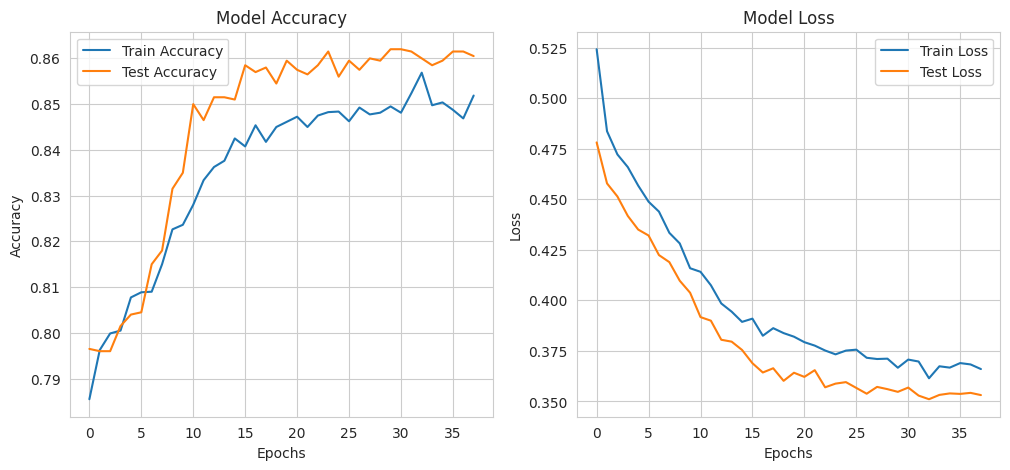

In [79]:
# Plot training history
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


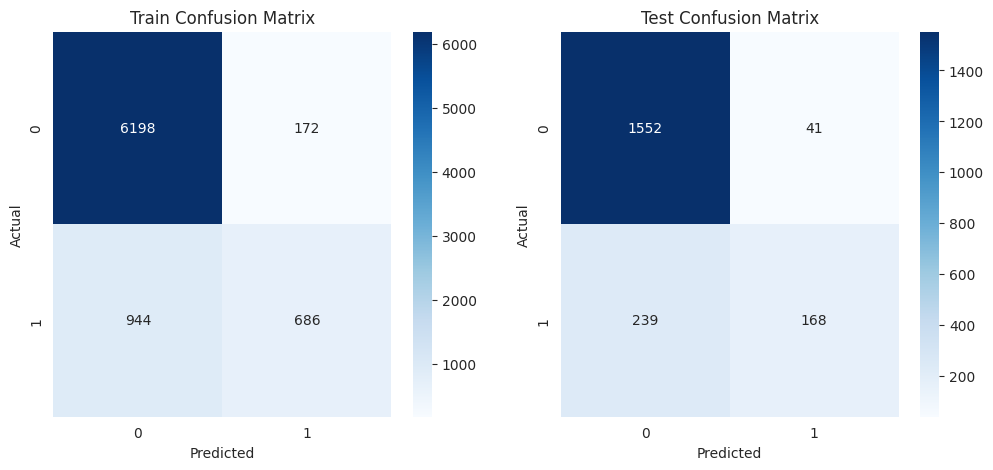

In [80]:
# Confusion Matrix
train_preds = (model.predict(sb51_X_train) > 0.5).astype(int)
test_preds = (model.predict(sb51_X_val) > 0.5).astype(int)

train_cm = confusion_matrix(sb51_y_train, train_preds)
test_cm = confusion_matrix(sb51_y_val, test_preds)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
# Classification Report
print("Train Classification Report:")
print(classification_report(sb51_y_train, train_preds))
print("Test Classification Report:")
print(classification_report(sb51_y_val, test_preds))

Train Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6370
           1       0.80      0.42      0.55      1630

    accuracy                           0.86      8000
   macro avg       0.83      0.70      0.73      8000
weighted avg       0.85      0.86      0.84      8000

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.80      0.41      0.55       407

    accuracy                           0.86      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [83]:
# Save the model
model.save("ann_churn_model.h5")

#### ANN Performance summary

1. Model Details:

* Architecture: 2 hidden layers (32 & 16 neurons, ReLU), dropout (0.3 & 0.2), and a sigmoid output.

* Optimizer: Adam | Loss: Binary Crossentropy | Metric: Accuracy

2. Results:

* Training Accuracy: 86.05%  |  Test Accuracy: 86.00%

* Confusion matrices and classification reports confirmed strong predictive performance.

3. Conclusion:</br>
The **model effectively predicts churn** with balanced accuracy and overfitting prevention through dropout and early stopping. Future improvements could explore hyperparameter tuning and alternative architectures.

****************************************